In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

In [86]:
# Load the training dataset
df = pd.read_csv('/kaggle/input/tcp-ip-ddos-udp/TCP_IP-DDoS-UDP1_train.pcap.csv')

# Load the testing dataset
df_test = pd.read_csv('/kaggle/input/tcp-ip-ddos-udp/TCP_IP-DDoS-UDP1_test.pcap.csv')

In [87]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55


In [88]:
df.shape

(206170, 45)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206170 entries, 0 to 206169
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    206170 non-null  float64
 1   Protocol Type    206170 non-null  float64
 2   Duration         206170 non-null  float64
 3   Rate             206170 non-null  float64
 4   Srate            206170 non-null  float64
 5   Drate            206170 non-null  float64
 6   fin_flag_number  206170 non-null  float64
 7   syn_flag_number  206170 non-null  float64
 8   rst_flag_number  206170 non-null  float64
 9   psh_flag_number  206170 non-null  float64
 10  ack_flag_number  206170 non-null  float64
 11  ece_flag_number  206170 non-null  float64
 12  cwr_flag_number  206170 non-null  float64
 13  ack_count        206170 non-null  float64
 14  syn_count        206170 non-null  float64
 15  fin_count        206170 non-null  float64
 16  rst_count        206170 non-null  floa

In [90]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,206170.000000,206170.000000,206170.000000,2.061700e+05,2.061700e+05,206170.0,206170.000000,206170.000000,2.061700e+05,206170.000000,...,206170.000000,206170.000000,206170.000000,2.061700e+05,206170.000000,206170.000000,206170.000000,206170.000000,206170.000000,206170.000000
mean,24736.444819,16.960670,64.401280,3.315114e+04,3.315114e+04,0.0,0.000002,0.000002,7.275549e-07,0.000187,...,50.505237,0.405005,50.502008,8.469252e+07,9.499423,10.022601,0.571519,191.161232,0.008449,141.534581
std,9157.797949,0.217455,2.214703,5.116397e+04,5.116397e+04,0.0,0.000143,0.000128,1.056190e-04,0.004175,...,11.608964,6.648823,11.252023,9.890516e+05,0.038958,0.414518,9.392879,4061.848920,0.044665,0.878438
min,323.140000,5.670000,58.880000,1.975310e+00,1.975310e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,49.292514,0.000000,49.520000,0.000000e+00,1.000000,9.927540,0.000000,0.000000,0.000000,1.000000
25%,18331.000000,17.000000,64.000000,1.814142e+04,1.814142e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469659e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
50%,24713.000000,17.000000,64.000000,2.033509e+04,2.033509e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469659e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
75%,31079.375000,17.000000,64.000000,2.459069e+04,2.459069e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469660e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
max,300348.050000,17.000000,124.930000,1.050541e+06,1.050541e+06,0.0,0.020000,0.020000,2.000000e-02,0.580000,...,918.472727,358.993729,886.880000,1.016359e+08,9.743590,36.982880,508.102627,241272.432141,0.950000,141.550000


In [91]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight'],
      dtype='object')

In [92]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
dtype: int64

In [93]:
df.nunique()

Header_Length       67392
Protocol Type         149
Duration              227
Rate               206170
Srate              206170
Drate                   1
fin_flag_number         3
syn_flag_number         3
rst_flag_number         3
psh_flag_number        30
ack_flag_number        55
ece_flag_number         1
cwr_flag_number         1
ack_count               9
syn_count              25
fin_count               7
rst_count            1145
HTTP                    3
HTTPS                  51
DNS                    38
Telnet                  1
SMTP                    1
SSH                     1
IRC                     1
TCP                    56
UDP                    58
DHCP                    1
ARP                    10
ICMP                   23
IGMP                    1
IPv                    10
LLC                    10
Tot sum              1693
Min                   226
Max                  1110
AVG                  3301
Std                  3290
Tot size              582
IAT         

In [94]:
# List of columns with only one unique value
columns_to_drop = ['Drate', 'ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 
                   'SSH', 'IRC', 'DHCP', 'IGMP']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Verify the changes
df.shape

(206170, 36)

In [95]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55


In [96]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [97]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [98]:
# Count the number of instances in each cluster
cluster_counts = df['Cluster'].value_counts()

# Identify the cluster with the fewest instances
anomaly_cluster = cluster_counts.idxmin()

# Flag anomalies
df['Anomaly'] = df['Cluster'] == anomaly_cluster


In [99]:
# Identify the cluster with the most instances
majority_cluster = cluster_counts.idxmax()

# Create the new 'Target' column
df['Target'] = df['Cluster'].apply(lambda x: 'Normal' if x == majority_cluster else 'Anomaly')

In [100]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [101]:
df['Target'].nunique()

2

In [102]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Cluster,Anomaly,Target
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1


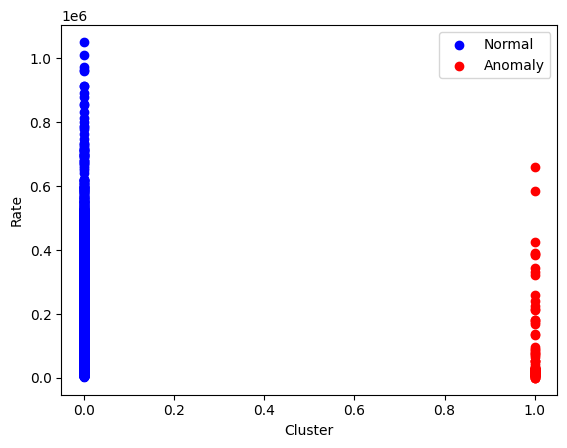

In [103]:
# Plotting the clusters
plt.scatter(df[df['Anomaly'] == False]['Cluster'], df[df['Anomaly'] == False]['Rate'], color='blue', label='Normal')
plt.scatter(df[df['Anomaly'] == True]['Cluster'], df[df['Anomaly'] == True]['Rate'], color='red', label='Anomaly')
plt.xlabel('Cluster')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [104]:
# List of redundant columns
columns_to_drop = ['Anomaly','Cluster']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [105]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'TCP', 'UDP', 'ARP',
       'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'Target'],
      dtype='object')

## Correlation with the target column

In [106]:
correlation_matrix = df.corr()['Target']

# Display the correlation of each column with the 'Target' column
print(correlation_matrix)

Header_Length     -0.114899
Protocol Type      0.403346
Duration          -0.033426
Rate              -0.003865
Srate             -0.003865
fin_flag_number   -0.017015
syn_flag_number   -0.019028
rst_flag_number   -0.035289
psh_flag_number   -0.121796
ack_flag_number   -0.587528
ack_count         -0.010124
syn_count         -0.126846
fin_count         -0.036981
rst_count         -0.569271
HTTP               0.000140
HTTPS             -0.673670
DNS                0.000220
TCP               -0.587471
UDP                0.473844
ARP               -0.044980
ICMP              -0.020327
IPv                0.044980
LLC                0.044980
Tot sum           -0.854096
Min               -0.667378
Max               -0.836852
AVG               -0.853564
Std               -0.803345
Tot size          -0.845459
IAT               -0.001060
Number             0.002073
Magnitue          -0.868069
Radius            -0.802172
Covariance        -0.813945
Variance          -0.223896
Weight             0

## Mutual information with the target column

In [107]:
# Assuming 'df' is your DataFrame and 'Target' is the column you've created
X = df.drop('Target', axis=1) # Features
y = df['Target'] # Target variable

mi = mutual_info_regression(X, y)
mi /= np.max(mi) # Normalize the mutual information values

mi_series = pd.Series(mi)
mi_series.index = X.columns
mi_series.sort_values(ascending=False)

print(mi_series)

Header_Length      0.274463
Protocol Type      0.726930
Duration           0.000000
Rate               0.048472
Srate              0.048472
fin_flag_number    0.017784
syn_flag_number    0.000000
rst_flag_number    0.000000
psh_flag_number    0.145365
ack_flag_number    0.620615
ack_count          0.152077
syn_count          0.257306
fin_count          0.183257
rst_count          0.384777
HTTP               0.006499
HTTPS              0.691775
DNS                0.000000
TCP                0.516267
UDP                0.681540
ARP                0.020387
ICMP               0.123526
IPv                0.000000
LLC                0.000000
Tot sum            1.000000
Min                0.663835
Max                0.671907
AVG                0.816505
Std                0.748786
Tot size           0.964090
IAT                0.176533
Number             0.144739
Magnitue           0.828605
Radius             0.719181
Covariance         0.575704
Variance           0.357330
Weight             0

In [108]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'TCP', 'UDP', 'ARP',
       'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'Target'],
      dtype='object')